# Иссдование закономерностей определяющих успешность игры

Исслледование для интернет-магазина, который продаёт по всему миру компьютерные игры.
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Предоставлены данные до 2016 года. Планируется рекламная кампания на 2017-й. Нужно отработать принцип работы с данными.

* **name** — название игры
* **platform** — платформа
* **year_of_release** — год выпуска
* **genre** — жанр игры
* **na_sales** — продажи в Северной Америке (миллионы проданных копий)
* **eu_sales** — продажи в Европе (миллионы проданных копий)
* **jp_sales** — продажи в Японии (миллионы проданных копий)
* **other_sales** — продажи в других странах (миллионы проданных копий)
* **critic_score** — оценка критиков (максимум 100)
* **user_score** — оценка пользователей (максимум 10)
* **rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### Загружаем данные

#### Импортируем Библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtl
import seaborn as sns
import numpy as np
from scipy import stats as st

#### Загружаем данные из файла в датафрейм. Выводим первые 20 строчек датафрейма `data`.

In [ ]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Изучаем общую информацию о полученном датафрейме.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
np.round(data.describe(), 1).T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.5,5.9,1980.0,2003.0,2007.0,2010.0,2016.0
NA_sales,16715.0,0.3,0.8,0.0,0.0,0.1,0.2,41.4
EU_sales,16715.0,0.1,0.5,0.0,0.0,0.0,0.1,29.0
JP_sales,16715.0,0.1,0.3,0.0,0.0,0.0,0.0,10.2
Other_sales,16715.0,0.0,0.2,0.0,0.0,0.0,0.0,10.6
Critic_Score,8137.0,69.0,13.9,13.0,60.0,71.0,79.0,98.0


In [ ]:
print('Число дубликатов:', data.duplicated().sum())

Число дубликатов: 0


In [ ]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Выводы:**

1) В таблице приведены данные о компьютерных играх, пресвоенным им рейтингам и информацией о продажах в ряде стран.

2) Названия столбцов следует привести к нижнему регистру.

3) Были обнаружены пропуски в следующих столбцах:

* name - В данном столбце указано название игры, поэтому мы не можем заменить отсутствующие название. Таких позиций всего 2 предлагается их удалить без вреда для дальнейшего анализа.               
* year_of_release - Пропуски в этом столбце скорее всего абсолютно случайные и предсказать их не представляется возможным. Так как игры с пропущенным годом выпуска составляют всего 1.6%, а  этот параметр являеется важной характеристикой, то эти стороки стоит удалить)
* genre - Пропущенные значения обнаруженые в столбце критичны, так как таких позиций всего 2 предлагается их удалить.                  
* critic_score, user_score, rating - Почти в половине датасета отсутсвует информация об оценках и рейтинге. Удалять эти данные нельзя, потому что потеря данных будет существенна. С другой стороны заполнять данные значения средним или медианным тоже было бы не корректно, потому что от игры к игре оценка и рейтинг может меняться принципиально и независимо. Это могло бы значительно исказить данные и дальнейшие выводы.    
    

4) В некоторых столбцах указан некорректный тип данных:
* **year_of_release** - float64 заменить на int64, потому что это год релиза.
* **user_score** - object заменить на float64, потому что это оценка от 1 до 10.


5) В данных отсутствуют явные дубликаты.

### Предобработка данных

In [ ]:
# Приведем столбцы к нужному регистру
data.columns = data.columns.str.lower()

In [ ]:
# Удалим строки с пропусками
data.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)

In [ ]:
# Заменим пропуски для critic_score, user_score, rating
data[['critic_score', 'user_score', 'rating']] \
= data[['critic_score', 'user_score', 'rating']].fillna(-1)

In [ ]:
# В столбце user_score встречается значение tbd (to be determined), заменим его также на -1.
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

In [ ]:
# Заменим тип данных для year_of_release и user_score на корректный
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')

In [ ]:
# Проверим что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38


**Выводы:**

1) Названия столбцов приведены к нижнему регистру.

2) Проанализированы и обработаны пропуски в столбцах name, year_of_release, genre, critic_score, user_score, rating.

3) Тип данных заменен на корректный для столбцов year_of_release и user_score.
    
4) В датафрейм добавлен новый столбец total_sales.

### Исследовательский анализ данных

#### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [ ]:
data_pivot_by_years = data.pivot_table(index=['year_of_release'],  values='name', aggfunc='count')
data_pivot_by_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


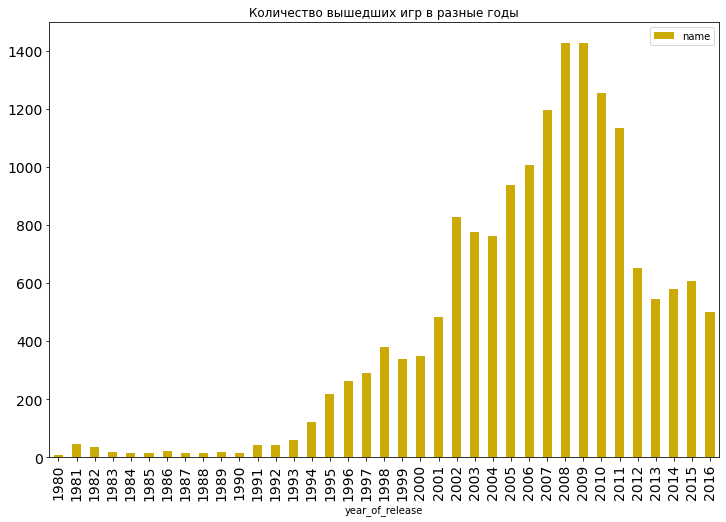

In [ ]:
data_pivot_by_years.plot(figsize = (12, 8), fontsize=14, kind='bar', color='#ccab06')
plt.title('Количество вышедших игр в разные годы');

По графику видно историю развития индустрии. В период с 1980 по 1990 игр выходило мало, скорее всего это было связано с незначительной распространенностью ПК у населения и несовершенностью технологий. Начиная с 1991 наблюдается постоянный рост числа релизов в 2008-2009 годах достигает максимума, когда в год выпускали более 1400 игр. После чего количество выпускаемых игр в год стало уменьшаться достигнув минимума в 2016 году.

Что это значит? Игровая индустрия активно развивается, значит было бы логично предположить, что с годами количество перешло в качество. Скорее всего сюжет, графика, механика игр стали более сложными, что занимает больше времени и ресурсов на этапе разработки.

Вероятно, вместе с качественными изменениями с индустрии изменились и потребители. Пока что очевидно, что в 2012 году произошли какие-то принципиальные изменения в индустрии. Вероятно, стоит отбросить данные до 2012 года.

In [ ]:
data_2012_2016 = data[data['year_of_release'] >= 2012]

#### Изучим как менялись продажи по платформам. Выбем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы?"

In [ ]:
data_pivot_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
data_pivot_by_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


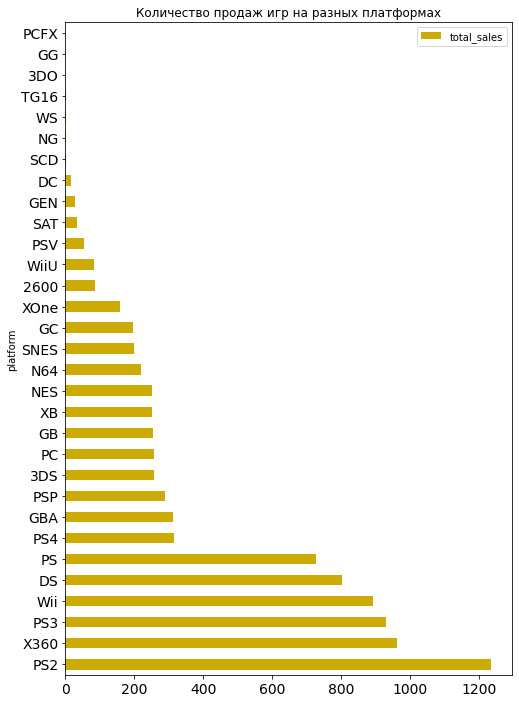

In [ ]:
data_pivot_by_platform.plot(figsize = (8, 12), fontsize=14, kind='barh', color='#ccab06')
plt.title('Количество продаж игр на разных платформах');

По графику видно, что есть 3 группы платформ. На которых вышло более 700 игр, около 300 игр и на которых вышли единицы. Однако непонятно в какие временные промежутки времени происходила активность на данных платформах. Рассмотрим платформы на которых вышло максимальное  количество игр: PS, DS, Wii, PS3, X360, PS2.

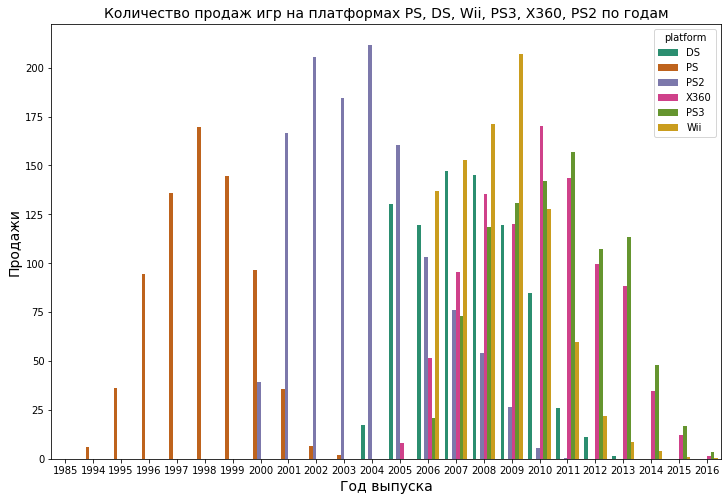

In [ ]:
# Создаем список с платформами на которых вышло больше всего игр
platform_activity = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

# группируем данные по годам и платформам
platform_activity_by_year = (
    data.query('platform in @platform_activity')
    .groupby(['year_of_release', 'platform'], as_index=False)
    .agg({'total_sales': 'sum'})
    .sort_values('year_of_release', ascending=True)
)

# строим график
plt.figure(figsize=(12, 8))
sns.barplot(x=platform_activity_by_year.year_of_release,
             y=platform_activity_by_year.total_sales,
             hue=platform_activity_by_year.platform,
             palette='Dark2')
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Количество продаж игр на платформах PS, DS, Wii, PS3, X360, PS2 по годам', fontsize=14);

По графику видно, что платформа PS активно использовалась в промежутке 1994-2003 годы с максимумом ав 1998 году. За ней набрала популярность платформа PS2, которая работала в 2000-2010 годы. В 2004 появилась на рынке DS, где пробыла до 2013 года. Эти три платформы мы больше не будем рассматривать, так как их активное использование не попадает на интересующий нас период (2012-2016 годы).

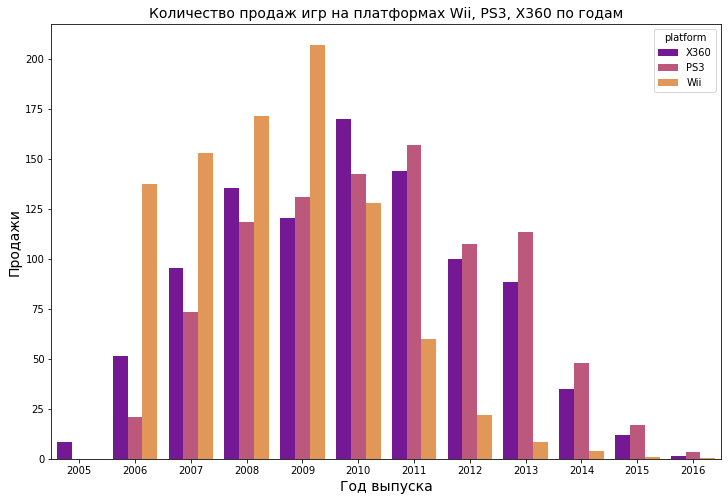

In [ ]:
# Уменьшаем список с платформами
platform_activity_cut = ['Wii', 'PS3', 'X360']

# группируем данные по годам и платформам
platform_activity_by_year = (
    data.query('platform in @platform_activity_cut')
    .groupby(['year_of_release', 'platform'], as_index=False)
    .agg({'total_sales': 'sum'})
    .sort_values('year_of_release', ascending=True)
)

# строим график
plt.figure(figsize=(12, 8))
sns.barplot(x=platform_activity_by_year.year_of_release,
             y=platform_activity_by_year.total_sales,
             hue=platform_activity_by_year.platform,
             palette='plasma')
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Количество продаж игр на платформах Wii, PS3, X360 по годам', fontsize=14);

По графику видно, что в 2009 году максимальные продажи были у игра на платформе Wii, в 2010 на X360, в 2011 на PS3. Далее продажи стали снижаться. Можно было бы предположить, что индустрия терпит бедствие, но здравый смысл говорит, что нет. Поэтому, скорее всего, как было сказано ранее, количество перешло в качество.

Вероятнее всего нет смысла для дальнейшего анализа рассматривать платформу Wii, так как ее активность в 2016 году незначительна.

Еще одним интересным фактом, который хорошо наблюдается на обоих графиках является то, что срок 'жизни' платформы составляет приблизительно 10 лет.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

В случае если количество переходит в качество, то неправильно сортировать платформы только на основании количества продаж. Посмотрим какие платформы присутствовали на рынке с 2012 года.

In [ ]:
data_last_years = data[data['year_of_release'] >= 2012]
data_last_years_sorted = data_last_years.sort_values(by='total_sales', ascending=False)
data_last_years_sorted['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

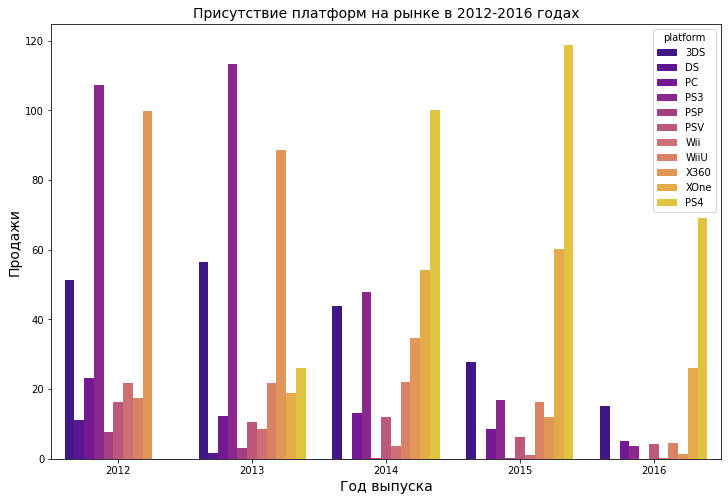

In [ ]:
# Создаем список с платформами на которых вышло больше всего игр
platform_activity = data_last_years_sorted['platform']

# группируем данные по годам и платформам
platform_activity_by_year = (
    data_last_years.query('platform in @platform_activity')
    .groupby(['year_of_release', 'platform'], as_index=False)
    .agg({'total_sales': 'sum'})
    .sort_values('year_of_release', ascending=True)
)

# строим график
plt.figure(figsize=(12, 8))
sns.barplot(x=platform_activity_by_year.year_of_release,
             y=platform_activity_by_year.total_sales,
             hue=platform_activity_by_year.platform,
             palette='plasma')
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Присутствие платформ на рынке в 2012-2016 годах', fontsize=14);

При рассмотрении графика становится очевидным факт, что на рынке за 5 лет сменились лидеры. PS3 и  X360  уступили первенство PS4 и XOne. Присутствие в индустрии 3DS значительно сохранилось, однако, платформа все еще входит в тройку лидеров. С ними и продолжим работу.

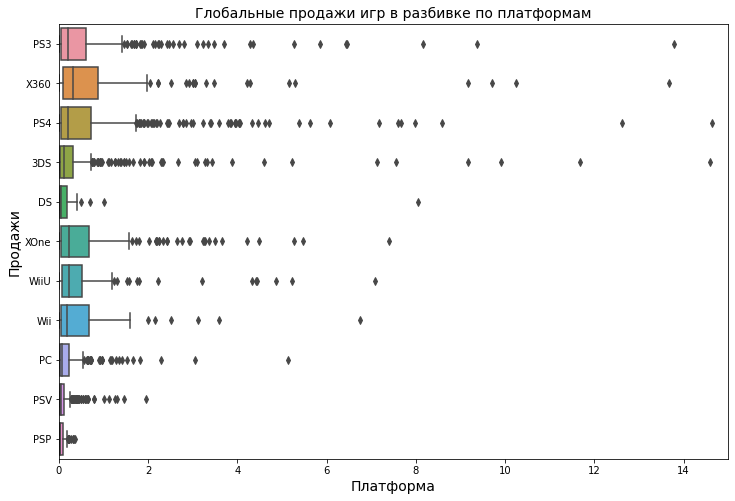

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="total_sales", y="platform", data=data_last_years)
plt.xlim(0, 15)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=14);

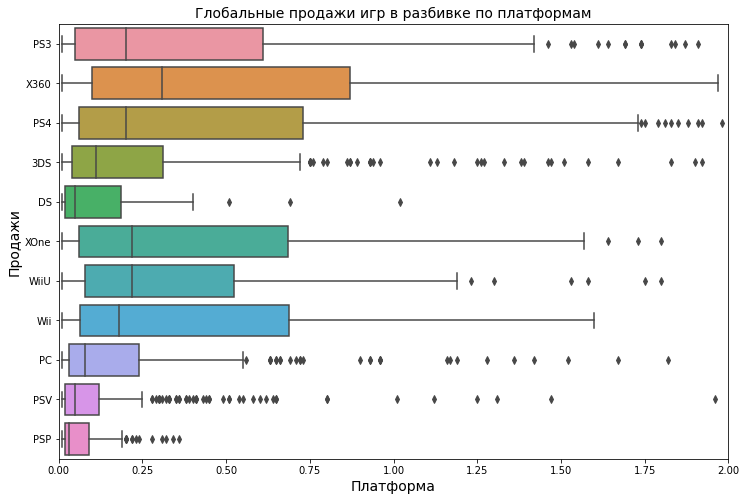

In [ ]:
# Построим поближе
plt.figure(figsize=(12, 8))
sns.boxplot(x="total_sales", y="platform", data=data_last_years)
plt.xlim(0, 2)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=14);

Однако, на рынке за 5 лет сменились лидеры. PS3 и X360 уступили первенство PS4 и XOne. Присутствие в индустрии 3DS значительно сохранилось, однако, платформа все еще входит в тройку лидеров. Поэтому продолжаем работу с PS4, XOne и 3DS.

In [ ]:
# Оставим только строки с платформами PS4, 3DS, XOne
data_top3 = data_last_years.query('platform == "PS4" or platform == "3DS" or platform == "XOne"')

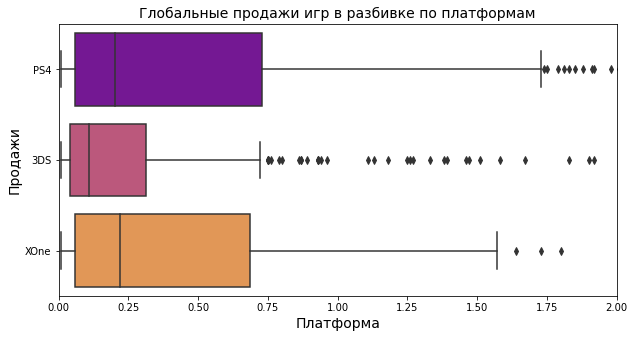

In [ ]:
# Построим поближе
plt.figure(figsize=(10, 5))
sns.boxplot(x="total_sales", y="platform", data=data_top3, palette='plasma')
plt.xlim(0, 2)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=14);

* По большинству платформ наблюдается большое количество выбросов, что свидетельствует о существовании игр бестселлеров, которые приносят сверхприбыли.
*  Рассмотрены медианные продажи по каждой платформе. Платформы PSЗ, X360, PS4, XOne, WiiU и Wii имеют сравнимые значения, лидирует платформа X360.
* Однако, на рынке за 5 лет сменились лидеры. PS3 и X360 уступили первенство PS4 и XOne. Присутствие в индустрии 3DS значительно сохранилось, однако, платформа все еще входит в тройку лидеров. Поэтому продолжаем работу с PS4, XOne и 3DS.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Для анализа выберем данные связанные с платформой PS4. Затем построим диаграммы рассеяния  и посчитаем коэффициенты корреляции Пирсона.

In [ ]:
# Выберем данные связанные с платформой PS4.
platform_ps4 = data_last_years.query('platform == "PS4" and user_score > 0 and critic_score > 0')

In [ ]:
platform_ps4['user_score'].unique()

array([8.3, 4.3, 5.7, 5. , 6.5, 6.1, 7.9, 8.1, 3.4, 8.4, 6.3, 7.7, 9.2,
       4.9, 7.6, 6.7, 3.7, 7. , 6.9, 8.2, 6.8, 5.9, 7.8, 8.6, 7.3, 7.4,
       6.2, 6. , 7.1, 5.1, 6.6, 5.4, 4.5, 8.8, 8.5, 5.2, 7.2, 7.5, 5.5,
       3.6, 5.6, 8. , 8.7, 5.8, 3.8, 4.7, 3.3, 2.7, 2. , 1.5, 4.1, 6.4,
       2.9, 1.9, 3.5, 2.3])

In [ ]:
platform_ps4['critic_score'].unique()

array([97., 82., 83., 85., 87., 76., 93., 86., 77., 88., 80., 92., 70.,
       78., 84., 73., 81., 90., 74., 71., 89., 79., 68., 75., 63., 54.,
       61., 62., 69., 67., 65., 72., 60., 48., 66., 59., 57., 43., 47.,
       32., 53., 58., 38., 45., 19., 44., 64., 42., 25., 52., 31., 55.,
       49., 51.])

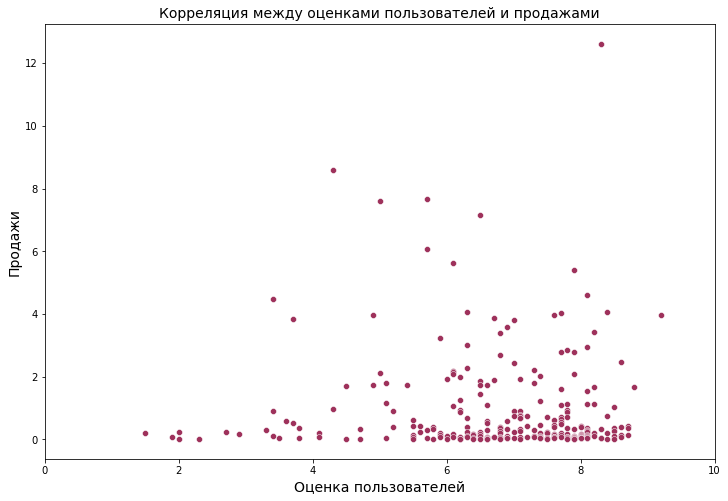

In [ ]:
# Построим диаграмму рассеяния для проверки корреляции между отзывами пользователей и продажами.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='user_score', y='total_sales', data=platform_ps4, color='#9e315b')
plt.xlim(0, 10)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Корреляция между оценками пользователей и продажами', fontsize=14);

In [ ]:
# Расчитаем коэффициент корреляции Пирсона.
print('Корреляция между оценками пользователей и продажами:', \
      platform_ps4['user_score'].corr(platform_ps4['total_sales']))

Корреляция между оценками пользователей и продажами: -0.03362497596528878


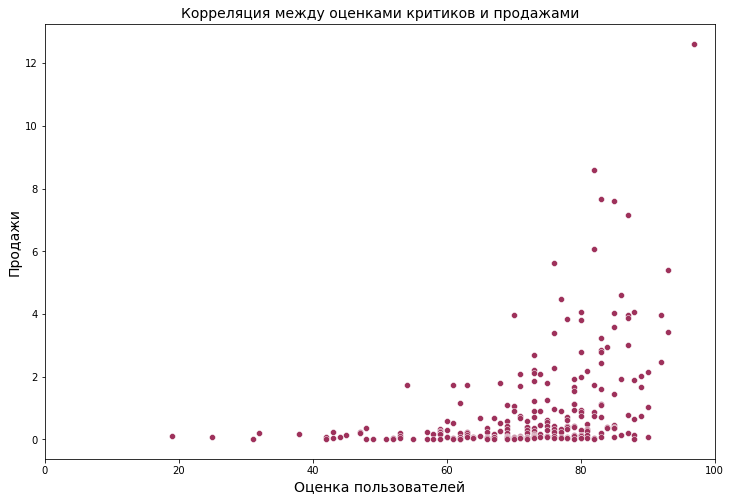

In [ ]:
# Построим диаграмму рассеяния для проверки корреляции между отзывами критиков и продажами.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='critic_score', y='total_sales', data=platform_ps4,  color='#9e315b')
plt.xlim(0, 100)
plt.xlabel('Оценка пользователей', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Корреляция между оценками критиков и продажами', fontsize=14);

In [ ]:
# Расчитаем коэффициент корреляции Пирсона.
print('Корреляция между оценками критиков и продажами:', \
      platform_ps4['critic_score'].corr(platform_ps4['total_sales']))

Корреляция между оценками критиков и продажами: 0.40589480145836687


* Оценки пользователей не влияют на продажи. Коэффициент корреляции равен -0.03
* Коэффициент корреляции Пирсона 0.4  показывает, что оценки критиков оказывают слобое влияние на продажи.
* Наблюдается, что критики склонны оценивать игры выше, чем пользователи.

#### Соотнесем выводы с продажами игр на других платформах

##### 3DS

In [ ]:
# Выберем данные связанные с платформой 3DS.
platform_3ds = data_last_years.query('platform == "3DS" and user_score > 0 and critic_score > 0')

# Расчитаем коэффициенты корреляции Пирсона.
print('Корреляция между оценками критиков и продажами:', \
      platform_3ds['critic_score'].corr(platform_3ds['total_sales']))
print('Корреляция между оценками пользователей и продажами:', \
      platform_3ds['user_score'].corr(platform_3ds['total_sales']))

Корреляция между оценками критиков и продажами: 0.31055301915326294
Корреляция между оценками пользователей и продажами: 0.20181255007655283


##### XOne

In [ ]:
# Выберем данные связанные с платформой XOne.
platform_xone = data_last_years.query('platform == "XOne" and user_score > 0 and critic_score > 0')

# Расчитаем коэффициенты корреляции Пирсона.
print('Корреляция между оценками критиков и продажами:', \
      platform_xone['critic_score'].corr(platform_xone['total_sales']))
print('Корреляция между оценками пользователей и продажами:', \
      platform_xone['user_score'].corr(platform_xone['total_sales']))

Корреляция между оценками критиков и продажами: 0.41042203561296375
Корреляция между оценками пользователей и продажами: -0.09400318326920852


* Значительного влияния отзывов на продажи не выявлено ни для одной платформы.
* Мнение пользователейне влияет на продажи игр на платформах XOne и PS4. И оказывает слабое влияние на платформе 3DS.
* Влияние критиков на продажи значительнее, чем влияние пользователей. Например, коэффициент корреляции между оценками критиков и продажами игр на платформах XOne и PS4 примерно 0.4.

#### Посмотрим на общее распределение игр по жанрам.

In [ ]:
# Сдруппируем данные по жанрам
data_last_years.groupby(['genre']) \
    .agg({'name':'count', 'total_sales': 'sum'}).sort_values('total_sales', ascending=False)

,name,total_sales
genre,,
Action,1031,441.12
Shooter,235,304.73
Role-Playing,370,192.80
Sports,268,181.07
Misc,192,85.04
Platform,85,61.00
Racing,115,53.50
Fighting,109,44.49
Simulation,80,35.12


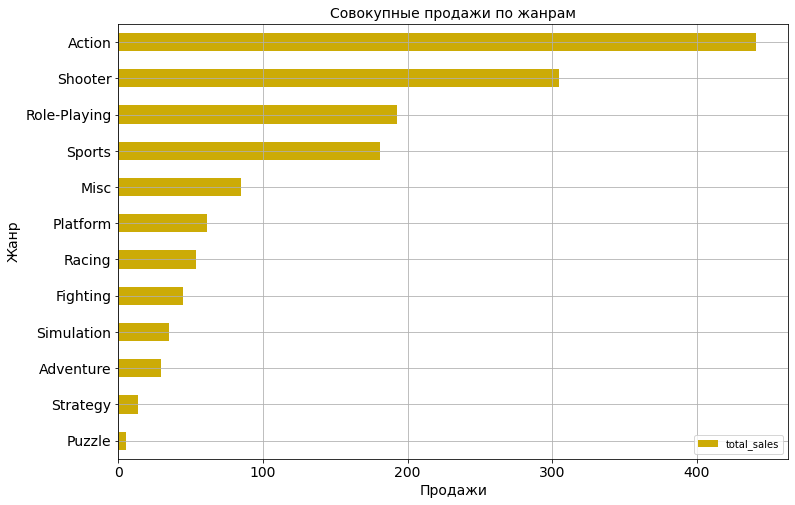

In [ ]:
# Сделаем данные нагляднее и постороим график продаж в различных жанрах.
genres_table = data_last_years.pivot_table(index='genre', values='total_sales', aggfunc='sum') \
    .sort_values(by='total_sales')
genres_table.plot(kind='barh', figsize=(12, 8), grid=True,  color='#ccab06', fontsize=14)
plt.title('Совокупные продажи по жанрам', fontsize=14)
plt.xlabel('Продажи', fontsize=14)
plt.ylabel('Жанр', fontsize=14)
plt.show()

За период с 2012 года больше всего игр выходило в жанре Action (1031 шт), за ним идет жанр Role-Playing (370 шт), затем Adventure (302 шт). Интересно, что распределение по продажам отличается.
Больше всего игр было продано в жанре Action, за ним идет жанр Shooter, затем Role-Playing, 441.12, 304.73, 192.80 миллионов продаж, соответственно. Игр в жанре Adventure было продано всего 29.43 копии. Так, тройка наименее продаваемых жанров: Adventure, Strategy, Puzzle.

Интересна причина по которой продолжали выходить игры в малочисленных жанрах. Вероятно, среди игр были очень коммерчески успешные игры. Посмотрим на выбросы.

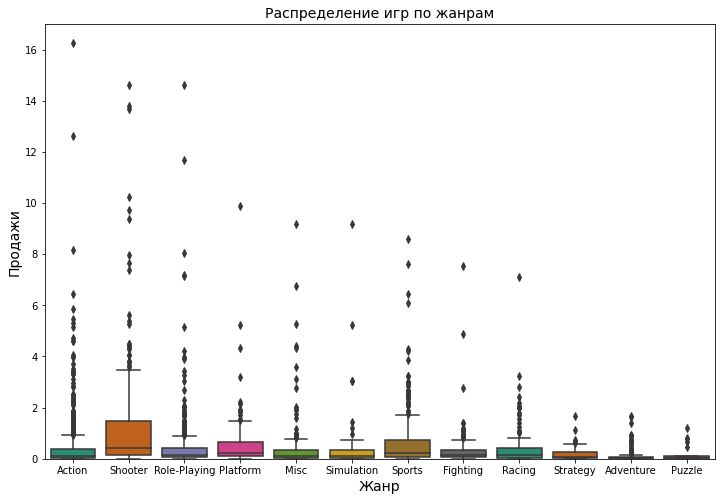

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data_last_years, x='genre', y='total_sales', palette='Dark2')
plt.ylim(0, 17)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Распределение игр по жанрам', fontsize=14);

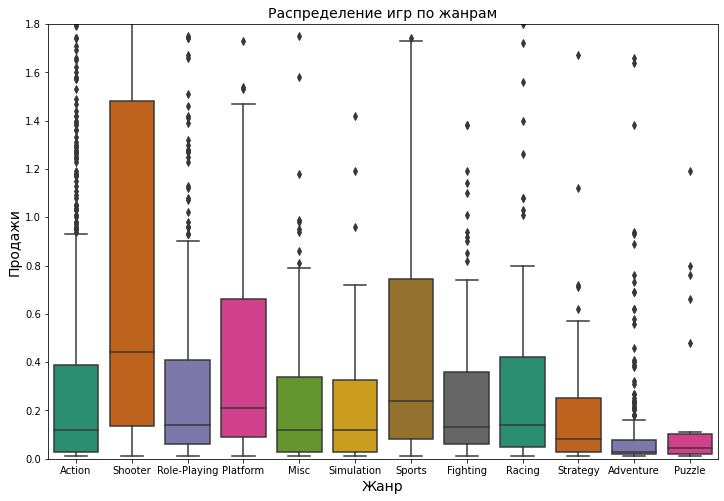

In [ ]:
# Посмотрим поближе
plt.figure(figsize=(12,8))
sns.boxplot(data=data_last_years, x='genre', y='total_sales', palette='Dark2')
plt.ylim(0, 1.8)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Распределение игр по жанрам', fontsize=14);

В ряде жанров наблюдаются выбросы, что говорит о том что есть ужень коммерчески удачные игры. Однако это все равно не объяснило большого количества игр жанра Adventure. Вероятно, это были те игры которые предустанавливаются на устройства.

Медианные продажи выше всего в жанре shooter, за ним следует жанр sports, затем platform.

**Ввводы:**
1) Была произведена оценко сколько игр выпускалось в разные годы. Оказалось, что в период с 1980 по 1990 ихр выходило мало, скорее всего это было связано с незначительной распространенностью ПК у населения и несовершенностью технологий. Начиная с 1991 наблюдается постоянный рост числа релизов в 2008-2009 годах достигает максимума, когда в год выпускали более 1400 игр. После чего количество выпускаемых игр в год стало уменьшаться достигнув минимума в 2016 году.

Что это значит? Игровая индустрия активно развивается, значит было бы логично предположить, что с годами количество перешло в качество. Скорее всего сюжет, графика, механика игр стали более сложными, что занимает больше времени и ресурсов на этапе разработки.

Вероятно вместе с качественными изменениями с индустрии изменились и потребители. Пока что очевидно, что в 2012 году произошли какие-то принципиальные изменения в индустрии. Вероятно стоит отбросить данные до 2012 года.

2) Было рассмотрено как менялись продажи по платформам. Оказалось, что платформа PS активно использовалась в промежутке 1994-2003 годы с максимумом ав 1998 году. За ней набрала популярность платформа PS2, которая работала в 2000-2010 годы. В 2004 появилась на рынке DS, где пробыла до 2013 года. Эти три платформы мы больше не будем рассматривать, так как их активное использование не попадает на интересующий нас период (2012-2016 годы).

В 2009 году максимальные продажи были у игр на платформе Wii, в 2010 на X360, в 2011 на PS3. Далее продажи стали снижаться. Можно было бы предположить, что индустрия терпит бедствие, но здравый смысл говорит, что нет. Поэтому, скорее всего, как было сказано ранее, количество перешло в качество.

Оказалось, что срок 'жизни' платформы составляет приблизительно 10 лет.

3) Были определены потенциально прибыльтные платформы: PS4, XOne, 3DS.

4) Был построен график «ящик с усами».
* По большинству платформ наблюдается большое количество выбросов, что свидетельствует о существовании игр бестселлеров, которые приносят сверхприбыли.
*  Рассмотрены медианные продажи по каждой платформе. Платформы PSЗ, X360, PS4, XOne, WiiU и Wii имеют сравнимые значения, лидирует платформа X360.
* Однако, на рынке с 2012 происходили изенения и менялись лидеры. PS3 и X360 уступили первенство PS4 и XOne. Присутствие в индустрии 3DS значительно сохранилось, однако, платформа все еще входит в тройку лидеров (PS4, XOne и 3DS).

5)  Было проанализировано влияние отзывов пользователей и критиков на продажи.
* Значительного влияния отзывов на продажи не выявлено ни для одной платформы.
* Мнение пользователейне влияет на продажи игр на платформах XOne и PS4. И оказывает слабое влияние на платформе 3DS.
* Влияние критиков на продажи значительнее, чем влияние пользователей. Например, коэффициент корреляции между оценками критиков и продажами игр на платформах XOne и PS4 примерно 0.4.

6) За период с 2012 года больше всего игр выходило в жанре Action (1031 шт), за ним идет жанр Role-Playing (370 шт), затем Adventure (302 шт). Интересно, что распределение по продажам отличается.
Больше всего игр было продано в жанре Action, за ним идет жанр Shooter, затем Role-Playing, 441.12, 304.73, 192.80 миллионов продаж, соответственно. Игр в жанре Adventure было продано всего 29.43 копии. Так, тройка наименее продаваемых жанров: Adventure, Strategy, Puzzle.

### Составим портрет пользователя каждого региона  (NA, EU, JP)

#### Найдем самые популярные платформы (топ-5).

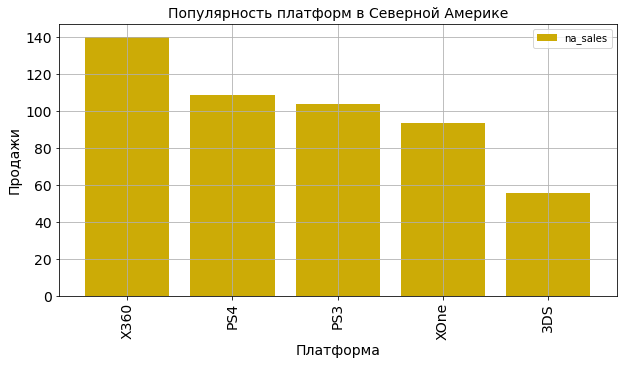

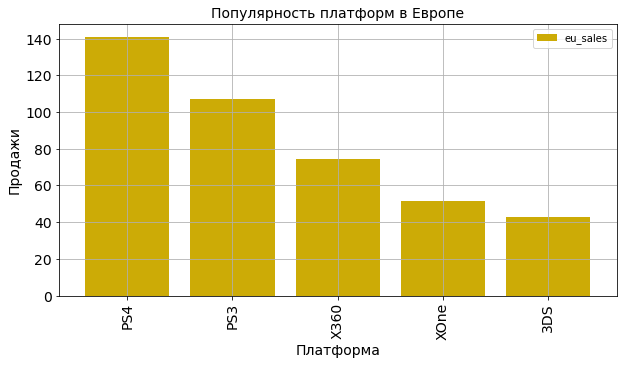

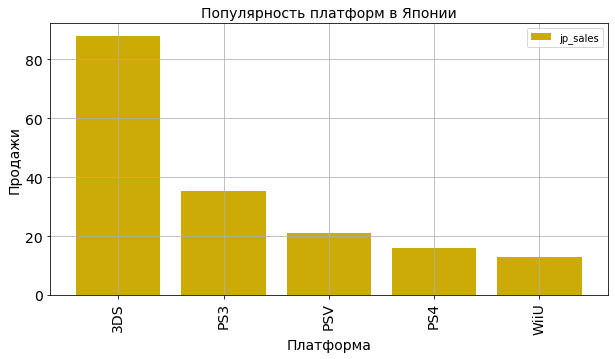

In [ ]:
# Популярность платформ в Северной Америке.
data_last_years.groupby(by='platform').agg({'na_sales':'sum'}) \
    .sort_values(by='na_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Популярность платформ в Северной Америке', fontsize=14);


# Популярность платформ в Европе.
data_last_years.groupby(by='platform').agg({'eu_sales':'sum'}) \
    .sort_values(by='eu_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Популярность платформ в Европе', fontsize=14);


# Популярность платформ в Японии.
data_last_years.groupby(by='platform').agg({'jp_sales':'sum'}) \
    .sort_values(by='jp_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Платформа', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Популярность платформ в Японии', fontsize=14);

Графики популярности платформ показывают, что в разных регионах популярны различные платформы. Возможено есть ориентированность рынка игр и платформ для разных регионов мира. Для Японии топ3: 3DS, PS3, PSV; для Европы: PS4, PS3, X360; для Северной Америки: X360, PS4, PS3. Так, можно заметить, что в топ3 для Европы и Северной Америки входят одни и теже платформы, но Х360  в Европе значительно менее популярен. В Японии первое место занимает платформа 3DS, по всей видимости японцы - целевая аудитория.

По графику видно, что есть 3 группы платформ. На которых вышло более 700 игр, около 300 игр и на которых вышли единицы. Однако непонятно в какие временные промежутки времени происходила активность на данных платформах. Рассмотрим платформы на которых вышло максимальное количество игр: PS, DS, Wii, PS3, X360, PS2.

#### Найдем самые популярные жанры (топ-5).

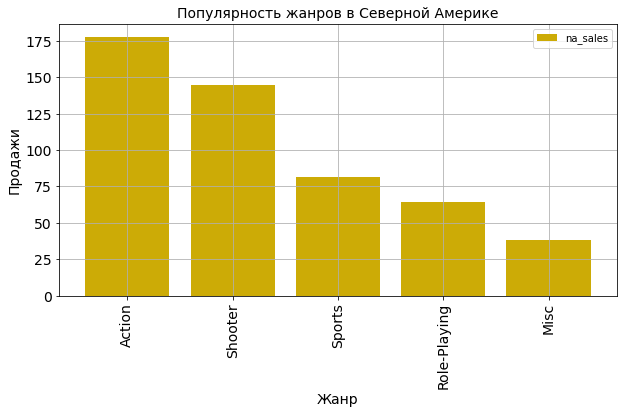

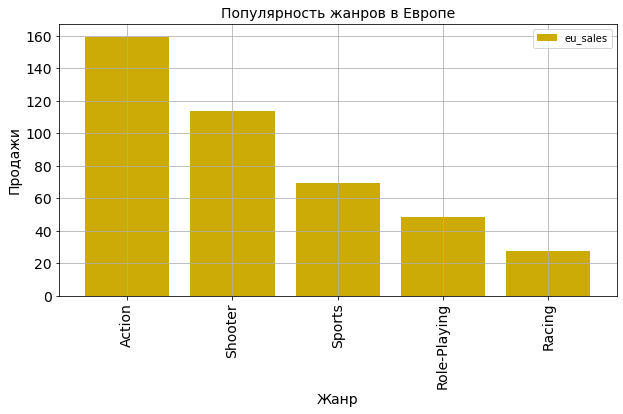

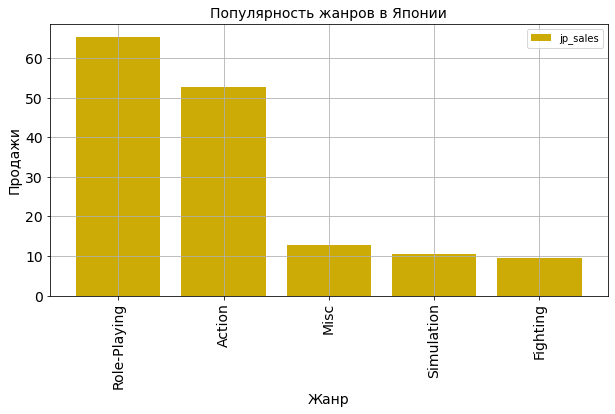

In [ ]:
# Популярность жанров в Северной Америке.
data_last_years.groupby(by='genre').agg({'na_sales':'sum'}) \
    .sort_values(by='na_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Популярность жанров в Северной Америке', fontsize=14);


# Популярность жанров в Европе.
data_last_years.groupby(by='genre').agg({'eu_sales':'sum'}) \
    .sort_values(by='eu_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Популярность жанров в Европе', fontsize=14);


# Популярность жанров в Японии.
data_last_years.groupby(by='genre').agg({'jp_sales':'sum'}) \
    .sort_values(by='jp_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Популярность жанров в Японии', fontsize=14);

Популярность жанров игр для Европы и Северной Америки почти идентична, топ3: Action, Shooter, Sports. В Японии, как и в случае с популярностью платформ, свои треды. В Японии распространен жанр Role-Playing, затем Action, затем идут почти равнопопулярные Misc, Simulation и  Fighting.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

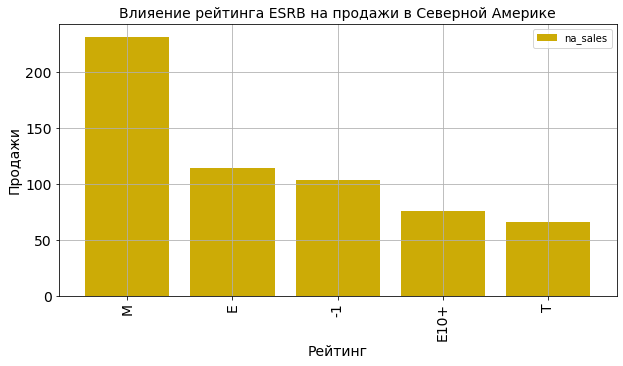

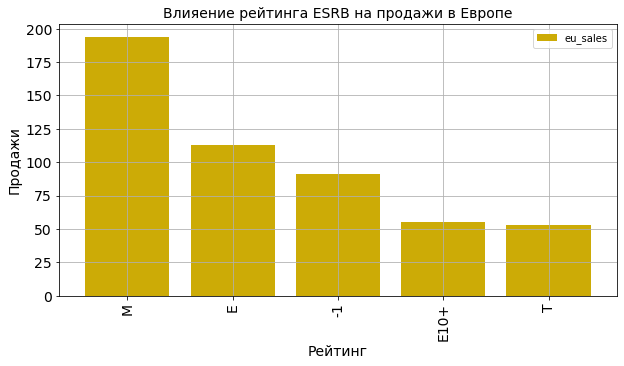

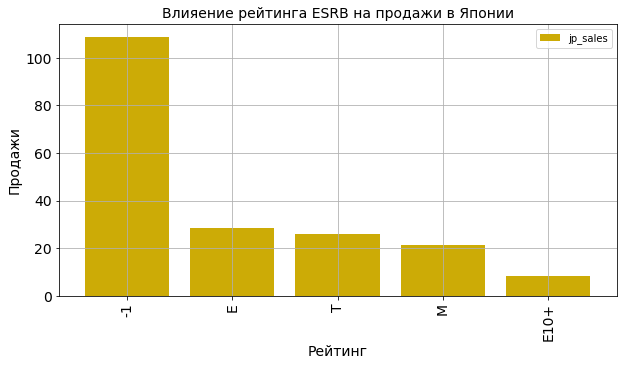

In [ ]:
# Влияение рейтинга ESRB на продажи в Северной Америке.
data_last_years.groupby(by='rating').agg({'na_sales':'sum'}) \
    .sort_values(by='na_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Влияение рейтинга ESRB на продажи в Северной Америке', fontsize=14);


# Влияение рейтинга ESRB на продажи в Европе.
data_last_years.groupby(by='rating').agg({'eu_sales':'sum'}) \
    .sort_values(by='eu_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Влияение рейтинга ESRB на продажи в Европе', fontsize=14);


# Влияение рейтинга ESRB на продажи в Японии.
data_last_years.groupby(by='rating').agg({'jp_sales':'sum'}) \
    .sort_values(by='jp_sales', ascending=False).head(5) \
    .plot(kind='bar', figsize=(10, 5), width=0.8, grid=True, color='#ccab06', fontsize=14)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.title('Влияение рейтинга ESRB на продажи в Японии', fontsize=14);

Графики показывают, что рынки Европы и Северной Америки очень похожи. Наибольшей популярностью пользуются игры рейтинга M (Для взрослых), затем E (Для всех), затем ряд игр для которых не  был указан рейтинг, затем E10+» (Для всех от 10 лет и старше) и, наконец, Т (Подростки).  Это говорит, что в этих регионах очень много взрослых играют в игры. Что нужно учитывать при создании рекламы.

В Японии рынок принципиально отличается. На нем присутствует огромное количество игр которым либо рейтинг не был присвоен, либо просто отсутствия этих данных в базе. Вероятно в Японии использют другую систему рейтингов.
Далее с не очень большой разницей следуют Е (Для всех) и Т (Подростки), затем М (Для взрослых) и E10+» (Для всех от 10 лет и старше).

**Выводы:**
* Игровой рынок в Европе и Северной Америке очень похожи: там популярны игры в жанрах Аction и Shooter, на платформах X360, PS4, PS3, распределение геймеров по возрастам тоже примерно одинаковое, наиболее продаваемые игры в категории M(Для взрослых).
* Японский рынок сильно отличается, на нем очень распространены игры на платформах 3DS, PS3, PSV в жанре Role-Playing у который, как правило нет рейтинга ESRB.

###  Проверим гипотезы

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* **Н0:** Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
* **H1:** Средний пользовательский рейтинг платформ Xbox One и PC различается

In [ ]:
# Создадим переменные с оценоками по XOne и PC
xone = data_last_years[(data_last_years['platform'] == 'XOne') \
                       & (data_last_years['user_score'] > 0)]['user_score']
pc = data_last_years[(data_last_years['platform'] == 'PC') \
                     & (data_last_years['user_score'] > 0)]['user_score']

# Зададим уровень статистической значимости alpha
alpha = 0.05

# Проведем тест
results = st.ttest_ind(xone, pc)

# выведем на экран получившееся p-значение
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


#### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

* **Н0:** Средний пользовательский рейтинг жанров Action и Sports одинаковый
* **H1:** Средний пользовательский рейтинг жанров Action и Sports различается

In [ ]:
# Создадим переменные с оценоками по XOne и PC
action = data_last_years.loc[(data_last_years['genre'] == 'Action') \
                         & (data_last_years['user_score'] > 0)]['user_score']
sport = data_last_years.loc[(data_last_years['genre'] == 'Sports') \
                        & (data_last_years['user_score'] > 0)]['user_score']

# Зададим уровень статистической значимости alpha
alpha = 0.05

# Проведем тест
results = st.ttest_ind(action, sport)

# выведем на экран получившееся p-значение
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Выводы:**
* Не удалось отвергнуть нулевую гипотезу H0, поэтому будем считать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Отвергаем нулевую гипотезу **H0**, поэтому будем считать, что средние пользовательские рейтинги жанров Action и Sports разные.

### Выводы

Было проведено исслледование для интернет-магазина, который продаёт по всему миру компьютерные игры. Для того чтобы спланировть рекламную компанию были выявлены определяющие успешность игры закономерности.

1. **Данные были подгототовлены:**
* Названия столбцов приведены к нижнему регистру.
* Проанализированы и обработаны пропуски.
* Для некоторых столбцов тип данных заменен на корректный.
* В датафрейм добавлен новый столбец total_sales.


2.  **Проведен исследовательский анализ данных:**
* Была произведена оценка количества игр выпущенных в разные годы. Оказалось, что в период с 1980 по 1990 игр выходило мало, скорее всего это было связано с незначительной распространенностью ПК у населения и несовершенностью технологий. Начиная с 1991 наблюдается постоянный рост числа релизов в 2008-2009 годах достигает максимума, когда в год выпускали более 1400 игр. После чего количество выпускаемых игр в год стало уменьшаться достигнув минимума в 2016 году.Скорее всего сюжет, графика, механика игр стали более сложными, что занимает больше времени и ресурсов на этапе разработки. Вероятно вместе с качественными изменениями с индустрии изменились и потребители. Пока что очевидно, что в 2012 году произошли какие-то принципиальные изменения в индустрии. Было решено использовать в исследовании данные от 2012 года.


* Было рассмотрено как менялись продажи по платформам. Оказалось, что платформа PS активно использовалась в промежутке 1994-2003 годы с максимумом ав 1998 году. За ней набрала популярность платформа PS2, которая работала в 2000-2010 годы. В 2004 появилась на рынке DS, где пробыла до 2013 года. Эти три платформы мы больше не будем рассматривать, так как их активное использование не попадает на интересующий нас период (2012-2016 годы). В 2009 году максимальные продажи были у игр на платформе Wii, в 2010 на X360, в 2011 на PS3. Далее продажи стали снижаться. Можно было бы предположить, что индустрия терпит бедствие, но здравый смысл говорит, что нет. Поэтому, скорее всего, как было сказано ранее, количество перешло в качество. Оказалось, что срок 'жизни' платформы составляет приблизительно 10 лет.


* Были определены потенциально прибыльтные платформы: PS4, XOne, 3DS.


* Был построен график «ящик с усами».  По большинству платформ наблюдается большое количество выбросов, что свидетельствует о существовании игр бестселлеров, которые приносят сверхприбыли.


*  Рассмотрены медианные продажи по каждой платформе. Платформы PSЗ, X360, PS4, XOne, WiiU и Wii имеют сравнимые значения, лидирует платформа X360. Однако, на рынке с 2012 происходили изенения и менялись лидеры. PS3 и X360 уступили первенство PS4 и XOne. Присутствие в индустрии 3DS значительно сохранилось, однако, платформа все еще входит в тройку лидеров (PS4, XOne и 3DS).


* Было проанализировано влияние отзывов пользователей и критиков на продажи.  Значительного влияния отзывов на продажи не выявлено ни для одной платформы. Мнение пользователейне влияет на продажи игр на платформах XOne и PS4. И оказывает слабое влияние на платформе 3DS. Влияние критиков на продажи значительнее, чем влияние пользователей. Например, коэффициент корреляции между оценками критиков и продажами игр на платформах XOne и PS4 примерно 0.4.


*  За период с 2012 года больше всего игр выходило в жанре Action (1031 шт), за ним идет жанр Role-Playing (370 шт), затем Adventure (302 шт). Интересно, что распределение по продажам отличается. Больше всего игр было продано в жанре Action, за ним идет жанр Shooter, затем Role-Playing, 441.12, 304.73, 192.80 миллионов продаж, соответственно. Игр в жанре Adventure было продано всего 29.43 копии. Так, тройка наименее продаваемых жанров: Adventure, Strategy, Puzzle.

3. **Был составен портрет пользователя каждого региона:**
* Игровой рынок в Европе и Северной Америке очень похожи: там популярны игры в жанрах Аction и Shooter, на платформах X360, PS4, PS3, распределение геймеров по возрастам тоже примерно одинаковое, наиболее продаваемые игры в категории M(Для взрослых).
* Японский рынок сильно отличается, на нем очень распространены игры на платформах 3DS, PS3, PSV в жанре Role-Playing у который, как правило нет рейтинга ESRB.

4. **Была выполнена проверка двух гипотез:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Не удалось отвергнуть нулевую гипотезу H0, поэтому будем считать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Отвергаем нулевую гипотезу H0, поэтому будем считать, что средние пользовательские рейтинги жанров Action и Sports разные.

5. **Предлежения по развитию проекта:**
* Очевидно, что рейтинг игр является очень важным параметром. Так как в зависимости от целевой возрастной категории будет формироваться будующая рекламная компания. Для значительной части продаж игр в Японии маркировка отсутствует видимо изза того что у них есть свой рейтинг. Необходимо добавить эти данные в датасет.